*Pré-Processamento: Limpeza e transformação de dados*

**Grupo:** 
* Carlos Gabriel de Freitas - 19.1.4009
* Gabriel Mace dos Santos Ferreira - 19.1.4013
* Filipe Ramos de Souza Santo - 19.1.4027

**Disciplina:** Mineração de Dados (BCC444)

**Professor:** Anderson Almeida Ferreira

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.preprocessing import OneHotEncoder

In [ ]:
df = pd.read_csv("./train.csv")
print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [ ]:
print(f'Colunas do Dataset: {list(df.columns)}\n')

for column in list(df.columns):
  print(f'Exemplos de valores para a coluna {column}: {df[column].unique()[:5]}\n')

Colunas do Dataset: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

Exemplos de valores para a coluna PassengerId: [1 2 3 4 5]

Exemplos de valores para a coluna Survived: [0 1]

Exemplos de valores para a coluna Pclass: [3 1 2]

Exemplos de valores para a coluna Name: ['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' 'Futrelle, Mrs. Jacques Heath (Lily May Peel)'
 'Allen, Mr. William Henry']

Exemplos de valores para a coluna Sex: ['male' 'female']

Exemplos de valores para a coluna Age: [22. 38. 26. 35. nan]

Exemplos de valores para a coluna SibSp: [1 0 3 4 2]

Exemplos de valores para a coluna Parch: [0 1 2 5 3]

Exemplos de valores para a coluna Ticket: ['A/5 21171' 'PC 17599' 'STON/O2. 3101282' '113803' '373450']

Exemplos de valores para a coluna Fare: [ 7.25   71.2833  7.925  53.1     8.05  ]

Exemplos de valores para a coluna Cabin: [nan 'C85' 'C123' 

#Questão 1.a

##PassengerId

  O atributo representa uma identificação única para cada indivíduo.

  **tipo:** categórico ordinal, dado que o atributo é um número que identifica unicamente um indivíduo. 

##Survived

  O atributo representa se o individuo sobreviveu ou não ao acidente do Titanic.

  **tipo:** binário simétrico, dado que o atributo assume apenas 2 valores que possuem a mesma importância. 

##Pclass

  O atributo representa a classe das acomodações do individuo.

  **tipo:** ordinal discreto, dado que o atributo assume apenas 3 valores que possuem uma classificação significativa entre si. 

##Name

  O atributo que representa o nome de um indivíduo.

  **tipo:** categórico nominal, dado que o atributo representa o nome do individuo.

  **valores possiveis:** Qualquer string possível

##Sex

  O atributo representa o sexo dos individuos.

  **tipo:** binário simétrico, dado que o atributo assume apenas 2 valores que possuem a mesma importância. 
 
##Age

  O atributo representa a idade dos individuos.

  **tipo:** numérico de proporção, dado que o atributo é quantitativo e possui um ponto zero fixo 

##SibSp

  O atributo representa o número de irmãos/cônjuges do individuo.


  **tipo:** discreto numérico de proporção, dado que o atributo é quantitativo, possui um ponto zero fixo e valores finitos.

##Parch

  O atributo representa o número de pais/filhos do individuo.


  **tipo:** discreto numérico de proporção, dado que o atributo é quantitativo, possui um ponto zero fixo e valores finitos.

##Ticket

  O atributo representa a identificação do bilhete do individuo, composta por números e caracteres.


  **tipo:** categórico nominal, dado que o atributo identifica os bilhetes.

##Fare

  O atributo representa o custo do bilhete do individuo.


  **tipo:** contínuo, dado que o atributo possui valores infinitos.

##Cabin

  O atributo representa a cabine que o individuo está alojado.


  **tipo:** categórico nominal, dado que o atributo identifica as cabines.

##Embarked

  O atributo representa onde o individuo embarcou


  **tipo:** discreto, dado que o atributo possui valores finitos.

  **valores possíveis:** S (Southampton), Q (Queenstown) e C (Cherbourg)

## Questão 1.b

In [ ]:
def print_statistics(column_name):
  print(f'Coluna: {column_name}')
  print(f'Intervalo de Valores = [{df[column_name].min()} ~ {df[column_name].max()}]')
  print(f'Valor Médio = {df[column_name].mean()}')
  print(f'Valor Mínimo = {df[column_name].min()}')
  print(f'Valor Máximo = {df[column_name].max()}')
  print(f'Desvio Padrão = {df[column_name].std()}')

In [ ]:
numeric_attributes = ['Age', 'SibSp', 'Parch', 'Fare']
for attribute in numeric_attributes:
  print_statistics(attribute)
  print()

Coluna: Age
Intervalo de Valores = [0.42 ~ 80.0]
Valor Médio = 29.69911764705882
Valor Mínimo = 0.42
Valor Máximo = 80.0
Desvio Padrão = 14.526497332334042

Coluna: SibSp
Intervalo de Valores = [0 ~ 8]
Valor Médio = 0.5230078563411896
Valor Mínimo = 0
Valor Máximo = 8
Desvio Padrão = 1.1027434322934317

Coluna: Parch
Intervalo de Valores = [0 ~ 6]
Valor Médio = 0.38159371492704824
Valor Mínimo = 0
Valor Máximo = 6
Desvio Padrão = 0.8060572211299483

Coluna: Fare
Intervalo de Valores = [0.0 ~ 512.3292]
Valor Médio = 32.204207968574636
Valor Mínimo = 0.0
Valor Máximo = 512.3292
Desvio Padrão = 49.6934285971809



Podemos observar que, para todos os atributos númericos, o valor médio está mais próximo do valor mínimo do que o valor máximo.

Se utilizassemos os valores médios dos atributos numéricos para traçar o perfil de um tripulante a bordo do Titanic, teríamos um indivíduo de 30 anos, que possui dois membros familiares (irmãos, cônjuges, pais ou filhos), e cujo bilhete custou 50 libras.

Axes(0.125,0.11;0.775x0.77)


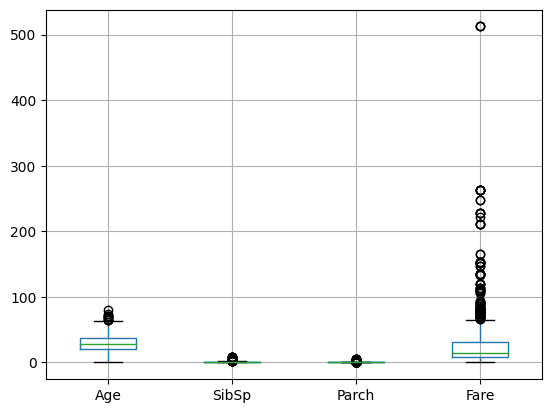

In [ ]:
boxplot = df.boxplot(column=['Age', 'SibSp', 'Parch', 'Fare'])
print(boxplot)

Ao traçar os possíveis valores dos atributos numéricos em um gráfico *boxplot*, podemos observar que, por exemplo, valores superiores a 200 libras para o custo de bilhetes são *outliers*.

#Questão 1.c

In [ ]:
def probability(qtd, total):
  return qtd/total

In [ ]:
categorical_atribute = ['Survived', 'Sex', 'Pclass']
for atribute in categorical_atribute:
  print(f"Valores possíveis para {atribute}: {df[atribute].unique()}")
  
  for value in df[atribute].unique():
    print(f"Probabilidade de {value}: {probability(df[atribute].value_counts()[value], len(df.index))}")
  


Valores possíveis para Survived: [0 1]
Probabilidade de 0: 0.6161616161616161
Probabilidade de 1: 0.3838383838383838
Valores possíveis para Sex: ['male' 'female']
Probabilidade de male: 0.6475869809203143
Probabilidade de female: 0.35241301907968575
Valores possíveis para Pclass: [3 1 2]
Probabilidade de 3: 0.5510662177328844
Probabilidade de 1: 0.24242424242424243
Probabilidade de 2: 0.20650953984287318


# Questão 1.d


In [ ]:
outlier_attributes = ['Ticket', 'Fare']

print(f"Quantidade de Valores Ausentes para cada atributo: \n{df.isnull().sum()}\n")

for attribute in list(outlier_attributes):
  print(f'Alguns Valores presentes no atributo {attribute}: {df[attribute].unique()[:5]}\n')

Quantidade de Valores Ausentes para cada atributo: 
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Alguns Valores presentes no atributo Ticket: ['A/5 21171' 'PC 17599' 'STON/O2. 3101282' '113803' '373450']

Alguns Valores presentes no atributo Fare: [ 7.25   71.2833  7.925  53.1     8.05  ]



É possível observar que grande parte dos valores ausentes pertencem ao atributo Cabin.

Além disso, a partir da análise dos dados é possível observar que o atributo Ticket apresenta inconsistências quanto a sua nomenclatura dado que em certos casos são utilizados apenas números, apenas letras ou uma combinação de ambos, de forma semelhante há uma inconsistência na taxa cobrada pela passagem de individuos dado que em alguns casos existe uma passagem sem custo.

O atributo Ticket também apresenta valores aberrantes sendo que os valores variam desde uma combinação numérica e de letras, até o uso de apenas números para descrever o código do bilhete. Ademais, a partir da análise realizada sobre os atributos numéricos é possível determinar que o atributo Fare possui valores aberrantes dado que o valor mínimo encontrado é 0.

# Questão 1.e

<Axes: >

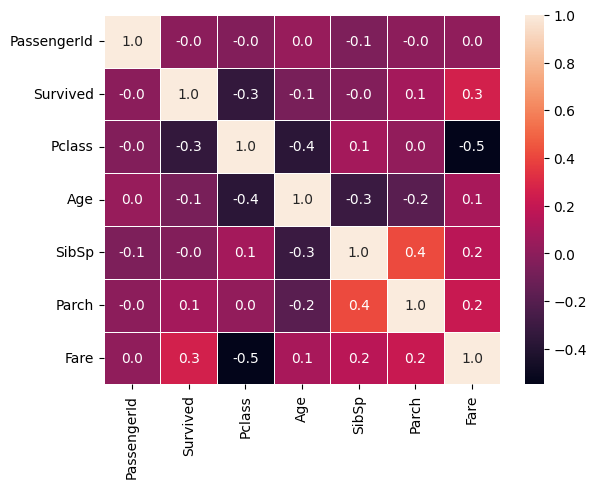

In [ ]:
correlation = df.corr(numeric_only=True)
plot = sn.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)
plot

Primeiramente, os valores dos coeficientes de correlação de Pearson apresentados no mapa de calor dizem o quão correlacionados dois atributos são: quanto mais próximos de 1 ou -1 o coeficiente for, mais correlacionados são os atributos.

É possível observar no mapa de calor que os atributos que possuem a maior correlação são o valor pago pelo bilhete do Titanic e a classe do alojamento. Dado que, os assentos presentes na primeira classse, usualmente, são mais caros quando comparados com os assentos da terceira classe.

Também vemos uma correlação entre a quantidade de irmãos e esposas, com a quantidade de pais e filhos que um individuo tem abordo no navio. Isso pode acontecer pois muito indivíduos poderiam estar fazendo uma viagem em família.

E por último, temos uma correlação entre a idade do individuo e a classe de seu alojamento. Para essa, não conseguimos identificar uma explicação para a correlação.

#Questão 2.a

In [ ]:
df['Cabin'] = df['Cabin'].fillna('')
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode())

O conjunto de dados possui três colunas que contêm valores nulos: **cabin**, **age**, e **embarked**. Então somente foi tratado esses valores.

Para o atributo **cabin** foi substituído os valores nulos por uma string vazia, já que o atributo é uma string que não possui um padrão.

Para o atributo **age** o valor substituído sob os nulos foi a média da idade.

E para o atributo **embarked**, os valores nulos foram substituídos pela moda dos valores no conjunto de dados.

# Questão 2.b

In [ ]:
pd.cut(df.Fare, bins=3, right=True)

0      (-0.512, 170.776]
1      (-0.512, 170.776]
2      (-0.512, 170.776]
3      (-0.512, 170.776]
4      (-0.512, 170.776]
             ...        
886    (-0.512, 170.776]
887    (-0.512, 170.776]
888    (-0.512, 170.776]
889    (-0.512, 170.776]
890    (-0.512, 170.776]
Name: Fare, Length: 891, dtype: category
Categories (3, interval[float64, right]): [(-0.512, 170.776] < (170.776, 341.553] <
                                           (341.553, 512.329]]

O único atributo que possui ruído é o **fare** que representa o preço dos bilhetes. Como o navio possui três classes, então dividimos os preços em três categorias eliminando assim qualquer ruído.

# Questão 2.c

A inconsistência presente no atributo Ticket não pode ser solucionada dado que seria extremamente custoso a padronização de todos os valores, além disso esse atributo não afeta a análise à ser realizada posteriormente.

In [ ]:
df[df['Fare'] == 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.000000,0,0,LINE,0.0,,S
263,264,0,1,"Harrison, Mr. William",male,40.000000,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.000000,0,0,LINE,0.0,,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,29.699118,0,0,239853,0.0,,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.000000,0,0,LINE,0.0,,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,29.699118,0,0,239853,0.0,,S
466,467,0,2,"Campbell, Mr. William",male,29.699118,0,0,239853,0.0,,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,29.699118,0,0,239854,0.0,,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.000000,0,0,LINE,0.0,,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,29.699118,0,0,112052,0.0,,S


In [ ]:
def medium_fare(pclass):
  return df[df['Pclass'] == pclass]['Fare'].mean()

print(f'Preço médio do bilhete da classe 1: {medium_fare(1)}')
print(f'Preço médio do bilhete da classe 2: {medium_fare(2)}')
print(f'Preço médio do bilhete da classe 3: {medium_fare(3)}')

Preço médio do bilhete da classe 1: 84.1546875
Preço médio do bilhete da classe 2: 20.662183152173913
Preço médio do bilhete da classe 3: 13.675550101832993


In [ ]:
pclasses = [1, 2, 3]

for pclass in pclasses:
  mean = medium_fare(pclass)
  df.loc[(df['Fare'] == 0) & (df['Pclass'] == pclass)].replace(0, mean)

A inconsistência presente no atributo Fare foi solucionada a partir da média dos valores pagos por individuos com o mesmo tipo de classe da passagem, para então substituir aqueles que se encontram zerados.

# Questão 2.d

In [ ]:
nominal_attributes = []

for index, row in df.iterrows():
  nominal_attributes.append([row["Name"], row["Ticket"], row["Cabin"]])

nominal_attributes = OneHotEncoder().fit_transform(df).toarray()
print(f'Vetor numérico contendo a transformação dos atributos categóricos nominais: {nominal_attributes}')

Vetor numérico contendo a transformação dos atributos categóricos nominais: [[1. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


# Questão 2.e

O atributo **PassengerId** não necessita de uma transformação para ser interpretado como um atributo numérico, já que ele identifica unicamente cada indivíduo, começando pelo valor 1 e sendo incrementado em 1 para cada registro.

Similiarmente, o atributo **Pclass** também não necessita de uma transformação, já que cada classe econômica é representada por um número do intervalo [1, 3], onde 1 é a classe mais alta e 3 é a mais baixa.

In [ ]:
print(f'Tipo da coluna PassengerId: {df["PassengerId"].dtypes}')
print(f'Tipo da coluna Pclass: {df["Pclass"].dtypes}')

Tipo da coluna PassengerId: int64
Tipo da coluna Pclass: int64


# Questão 2.f

In [ ]:
for attribute in numeric_attributes:
  df[attribute] = (df[attribute] - df[attribute].mean()) / df[attribute].std()
  print(f'Exemplos de valores normalizados para a coluna {attribute}: {df[attribute].unique()[:5]}\n')

Exemplos de valores normalizados para a coluna Age: [-0.59214803  0.63843044 -0.28450341  0.40769698  0.        ]

Exemplos de valores normalizados para a coluna SibSp: [ 0.43255043 -0.47427882  2.24620893  3.15303818  1.33937968]

Exemplos de valores normalizados para a coluna Parch: [-0.47340772  0.76719899  2.0078057   5.72962584  3.24841242]

Exemplos de valores normalizados para a coluna Fare: [-0.50216314  0.78640362 -0.48857985  0.42049407 -0.48606443]

